# K-Means Clustering for 1-d data

In [7]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import cv2

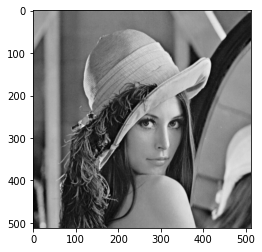

In [11]:
image = cv2.imread("images/lena.jpg", 0)
plt.imshow(image, cmap = "gray")
plt.show()

In [38]:
def img_encoder(img, num_clusters=4):
    
    inarray=np.array(img, dtype=np.float64)
    inarray=inarray.reshape((-1,1))
    
    kmeans = KMeans(n_clusters=num_clusters, init='random')
    kmeans.fit(inarray)
    
    centers=kmeans.cluster_centers_
    labels=kmeans.labels_
    
    return centers, labels

def img_decoder(labels, img_shape):
    
    f=[]
    for i in labels:
        f.append(centers[i])
        
    f = np.array(f)
    reconstructed = f.reshape(img_shape)
    
    return reconstructed

In [54]:
centers, labels = img_encoder(image, 16)

In [55]:
reconstructed = img_decoder(labels, (512, 512))

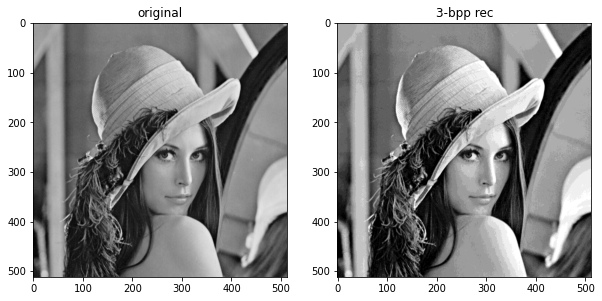

In [56]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(121), plt.gca().set_title("original"), plt.imshow(image, cmap = "gray")
plt.subplot(122), plt.gca().set_title("3-bpp rec"), plt.imshow(reconstructed, cmap = "gray")
plt.show()

# K-Means Clustering for n-d data

(512, 512)


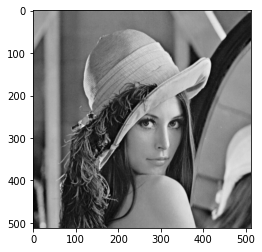

In [58]:
image = cv2.imread("images/lena.jpg", 0)
print(image.shape)
plt.imshow(image, cmap = "gray")
plt.show()

In [128]:
# Generate 4x4 block data
block_size = 4

# Set k value
num_clusters = 32

block_set = []

for i in range(128):
    for j in range(128):
        block = image[i*4:i*4+4, j*4:j*4+4]
        block = block.reshape((-1,))
        block_set.append(block)
        
block_set = np.array(block_set, dtype=np.float64)

kmeans = KMeans(n_clusters=num_clusters, init='random')
kmeans.fit(block_set)

centers=kmeans.cluster_centers_
labels=kmeans.labels_

r_blocks = []

for i in range(128):
    for j in range(128):
        r_sample = centers[labels[i*128+j]]
        r_sample = r_sample.reshape(4, 4)
        
        r_blocks.append(r_sample)
        
hstacks = []

for i in range(128):
    anchor = r_blocks[i*128]
    for j in range(127):
        patch = r_blocks[i*128+j+1]
        r_patch = np.hstack((anchor, patch))
        anchor = r_patch
    hstacks.append(anchor)
    
hstacks = np.array(hstacks)

anchor = hstacks[0]

for i in range(len(hstacks)-1):

    patch = hstacks[i+1]
    r_patch = np.vstack((anchor, patch))
    anchor = r_patch
    
print(anchor.shape)

(512, 512)


In [122]:
center8_image = anchor

In [124]:
center16_image = anchor

In [129]:
center32_image = anchor

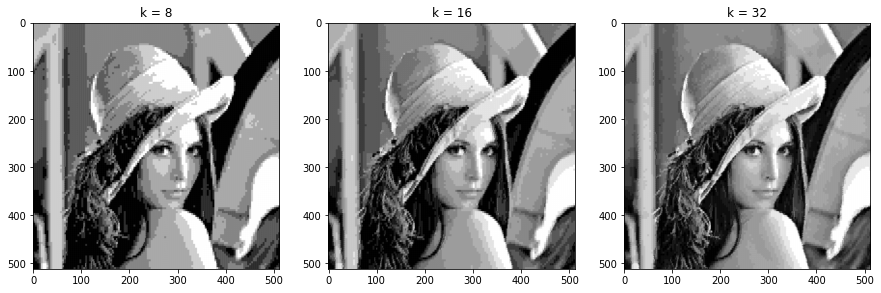

In [130]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(131), plt.gca().set_title("k = 8"), plt.imshow(center8_image, cmap = "gray")
plt.subplot(132), plt.gca().set_title("k = 16"), plt.imshow(center16_image, cmap = "gray")
plt.subplot(133), plt.gca().set_title("k = 32"), plt.imshow(center32_image, cmap = "gray")

plt.show()

In [131]:
a = 1.0
a.is_integer()

True

In [132]:
a = 1.2
a.is_integer()

False

In [141]:
def img_vector_encoder(image, block_size, k):
    
    block_per_axis = image.shape[0]/block_size
    
    if block_per_axis.is_integer():
        
        block_per_axis = int(block_per_axis)

        num_clusters = k
        block_set = []

        for i in range(block_per_axis):
            for j in range(block_per_axis):
                block = image[i*block_size:i*block_size+block_size, j*block_size:j*block_size+block_size]
                block = block.reshape((-1,))
                block_set.append(block)

        block_set = np.array(block_set, dtype=np.float64)

        kmeans = KMeans(n_clusters=num_clusters, init='random')
        kmeans.fit(block_set)

        centers=kmeans.cluster_centers_
        labels=kmeans.labels_

        r_blocks = []

        for i in range(block_per_axis):
            for j in range(block_per_axis):
                r_sample = centers[labels[i*block_per_axis+j]]
                r_sample = r_sample.reshape(block_size, block_size)

                r_blocks.append(r_sample)
                
        return r_blocks, centers, labels
                
    else:
        raise ValueError("Number of Blocks does not fit Image Size!")
             
                
def img_vector_decoder(r_blocks):

    hstacks = []
    block_per_axis = np.sqrt(len(r_blocks))
    
    block_per_axis = int(block_per_axis)

    for i in range(block_per_axis):
        anchor = r_blocks[i*block_per_axis]
        for j in range(block_per_axis-1):
            patch = r_blocks[i*block_per_axis+j+1]
            r_patch = np.hstack((anchor, patch))
            anchor = r_patch
        hstacks.append(anchor)

    hstacks = np.array(hstacks)

    anchor = hstacks[0]

    for i in range(len(hstacks)-1):

        patch = hstacks[i+1]
        r_patch = np.vstack((anchor, patch))
        anchor = r_patch

    return anchor

In [140]:
block_size = 4
k = 48
r_blocks, centers, labels = img_vector_encoder(image, block_size, k)

In [142]:
r_image = img_vector_decoder(r_blocks)

In [144]:
print(r_image.shape)

(512, 512)


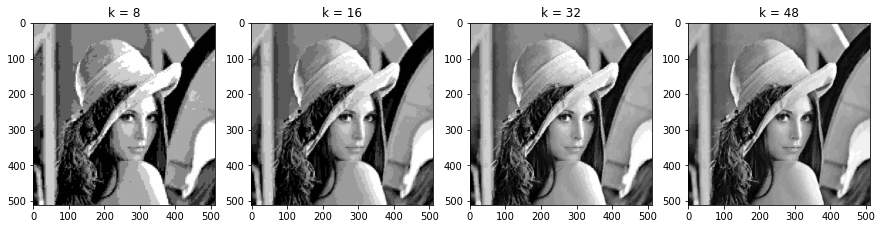

In [145]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(141), plt.gca().set_title("k = 8"), plt.imshow(center8_image, cmap = "gray")
plt.subplot(142), plt.gca().set_title("k = 16"), plt.imshow(center16_image, cmap = "gray")
plt.subplot(143), plt.gca().set_title("k = 32"), plt.imshow(center32_image, cmap = "gray")
plt.subplot(144), plt.gca().set_title("k = 48"), plt.imshow(r_image, cmap = "gray")

plt.show()

In [147]:
# cv2.imwrite("lena512.jpg", image)
cv2.imwrite("lena_k_8.jpg", center8_image)
cv2.imwrite("lena_k_16.jpg", center16_image)
cv2.imwrite("lena_k_32.jpg", center32_image)

True